In [1]:
pip install python-constraint


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24085 sha256=fabf07e1c2f69596ac7452f3d3328bc1b23a768a036f98b5bb9fca5e634446ed
  Stored in directory: c:\users\lssnd\appdata\local\pip\cache\wheels\c1\d2\3d\082849b61a9c6de02d4a7c8a402c224640f08d8a971307b92b
Successfully built python-constraint
Note: you may need to restart the kernel to use updated packages.


In [7]:
from constraint import Problem

#Define the Problem
problem = Problem()

#Variables (Positions to Fill)
roles = ["AI Engineer", "Systems Engineer", "Web Designer", "Database Admin"]

#Domains (Candidates for Each Role)
candidates = {
    "AI Engineer": ["Peter", "Juan", "Jim", "Anita", "Maria"],
    "Systems Engineer": ["Juan", "Jim", "Mary", "Bruce"],
    "Web Designer": ["Juan", "Mary", "Anita"],
    "Database Admin": ["Jim", "Jane"]
}

#Add Variables to the Problem with Relevant Domains
problem.addVariable("AI Engineer", candidates["AI Engineer"])
problem.addVariable("Systems Engineer", candidates["Systems Engineer"])
problem.addVariable("Web Designer", candidates["Web Designer"])
problem.addVariable("Database Admin", candidates["Database Admin"])

#Constraint 1: Unique Assignments (No Duplicate Candidates for Roles)
def unique_candidates(*args):
    return len(set(args)) == len(args)  # Ensure all assignments are unique

problem.addConstraint(unique_candidates, roles)

#Constraint 2: Max of Two Roles Per Candidate
def max_roles(*assignments):
    counts = {}
    for candidate in assignments:
        counts[candidate] = counts.get(candidate, 0) + 1
    return all(count <= 2 for count in counts.values())

problem.addConstraint(max_roles, roles)

#Solve the CSP
solutions = problem.getSolutions()

#Display Results
if solutions:
    print("Possible Assignments for Scenario 1:")
    for i, solution in enumerate(solutions, 1):
        print(f"\nSolution {i}:")
        for role, candidate in solution.items():
            print(f" - {role}: {candidate}")
        print("")  #Adds a blank line after each solution
else:
    print("No valid solution found!")


Possible Assignments for Scenario 1:

Solution 1:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Maria


Solution 2:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Jim


Solution 3:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Juan


Solution 4:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Peter


Solution 5:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Maria


Solution 6:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Jim


Solution 7:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Juan


Solution 8:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Peter


Solution 9:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Jim
 - AI En

## A* Algorithm Solution

In [3]:
import heapq

In [7]:
#Existing Data
positions = ["Database Admin", "Web Designer", "Systems Engineer", "AI Engineer"]
candidates = {
    "Jane": ["Database Admin", "Web Designer"],
    "Anita": ["Web Designer", "AI Engineer"],
    "Bruce": ["Systems Engineer"],
    "Maria": ["AI Engineer"],
    "Jim": ["AI Engineer", "Database Admin"],
    "Mary": ["Systems Engineer", "Web Designer"],
    "Juan": ["AI Engineer", "Web Designer"],
    "Peter": ["AI Engineer", "Systems Engineer"]
}

#Define A* Node
class Node:
    def __init__(self, assignment, cost, remaining_positions):
        self.assignment = assignment
        self.cost = cost
        self.remaining_positions = remaining_positions

    def __lt__(self, other):
        return self.cost < other.cost

#Heuristic Function: Counts unassigned positions (simplified example)
def heuristic(remaining_positions):
    return len(remaining_positions)

#Constraint Check: Valid assignment
def is_valid(assignment, position, candidate):
    #Max 2 roles per person
    if list(assignment.values()).count(candidate) >= 2:
        return False
    #Candidate must be qualified
    return position in candidates[candidate]

#Generate Successors
def successors(node):
    successors_list = []
    for candidate in candidates.keys():
        if node.remaining_positions:
            position = node.remaining_positions[0]
            if is_valid(node.assignment, position, candidate):
                new_assignment = node.assignment.copy()
                new_assignment[position] = candidate
                new_remaining_positions = node.remaining_positions[1:]
                new_cost = len(new_remaining_positions) + heuristic(new_remaining_positions)
                successors_list.append(Node(new_assignment, new_cost, new_remaining_positions))
    return successors_list

#A* Algorithm
def a_star_hiring(positions, candidates):
    initial_node = Node({}, 0, positions)
    frontier = []
    heapq.heappush(frontier, initial_node)
    
    while frontier:
        current_node = heapq.heappop(frontier)
        
        #Goal check
        if not current_node.remaining_positions:
            return current_node.assignment
        
        #Generate successors
        for successor in successors(current_node):
            heapq.heappush(frontier, successor)
    
    return None  #No solution

#Run the A* Algorithm
solution = a_star_hiring(positions, candidates)
print("Ideal Assignment:", solution)


Ideal Assignment: {'Database Admin': 'Jane', 'Web Designer': 'Jane', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'}


## Visualising Scenario 1

Constraint Visualisation:
- Show candidates and their skill sets.
- Illustrate domains for each role (e.g., candidates who qualify for each position).
- Visualise constraints such as "Max Roles per Person" and "One Role per Position."

Solution Visualisation:
- Represent the feasible solutions using tables, heatmaps, or bar charts.
- Use a bar chart to show the distribution of roles across candidates.
- Highlight the number of feasible solutions found.

### Organise Data

In [37]:
#List of all 59 solutions
solutions = [
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Jim', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Jim', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Jim', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Jim', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Jim', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Jim', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Jim', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Jim', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Jim', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Jim', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Peter'}
]

#Extract roles
roles = ['Database Admin', 'Web Designer', 'Systems Engineer', 'AI Engineer']

### Count Assignments

In [39]:
from collections import Counter

#Initialise counters for each role
role_counts = {role: Counter() for role in roles}

#Count occurrences
for solution in solutions:
    for role, individual in solution.items():
        role_counts[role][individual] += 1

#Print role counts
for role, counts in role_counts.items():
    print(f"{role}: {dict(counts)}")


Database Admin: {'Jane': 38, 'Jim': 21}
Web Designer: {'Anita': 22, 'Mary': 20, 'Juan': 17}
Systems Engineer: {'Bruce': 23, 'Mary': 14, 'Jim': 10, 'Juan': 12}
AI Engineer: {'Maria': 17, 'Jim': 7, 'Juan': 8, 'Peter': 17, 'Anita': 10}


### Candidate Skills Heatmap
Heatmap: To represent which candidates have the required skills for each position.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

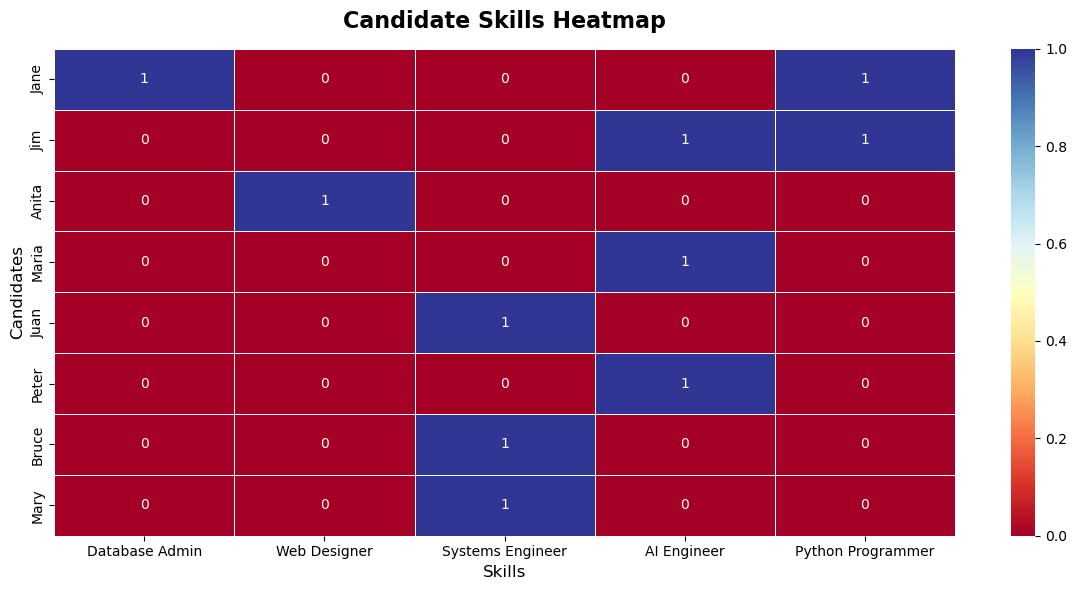

In [64]:
#Data(Candidates and their roles)
candidates = {
    "Jane": ["Database Admin", "Python Programmer"],
    "Jim": ["AI Engineer", "Python Programmer"],
    "Anita": ["Web Designer", "Frontend Developer"],
    "Maria": ["AI Engineer", "Data Scientist"],
    "Juan": ["Systems Engineer", "DevOps Specialist"],
    "Peter": ["AI Engineer", "Backend Developer"],
    "Bruce": ["Systems Engineer", "Network Specialist"],
    "Mary": ["Systems Engineer", "Project Manager"]
}

#Define the roles that will be displayed in the heatmap
roles = ["Database Admin", "Web Designer", "Systems Engineer", "AI Engineer", "Python Programmer"]

#To create a binary matrix of skills for the heatmap
skills_matrix = pd.DataFrame([
    {role: int(role in skills) for role in roles} for skills in candidates.values()
], index=candidates.keys())

#Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(skills_matrix, annot=True, cmap="RdYlBu", cbar=True, linewidths=0.5)
plt.title("Candidate Skills Heatmap", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

###  Domain Representation for Each Role
Bar chart: can display the domains (qualified candidates) for each position.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

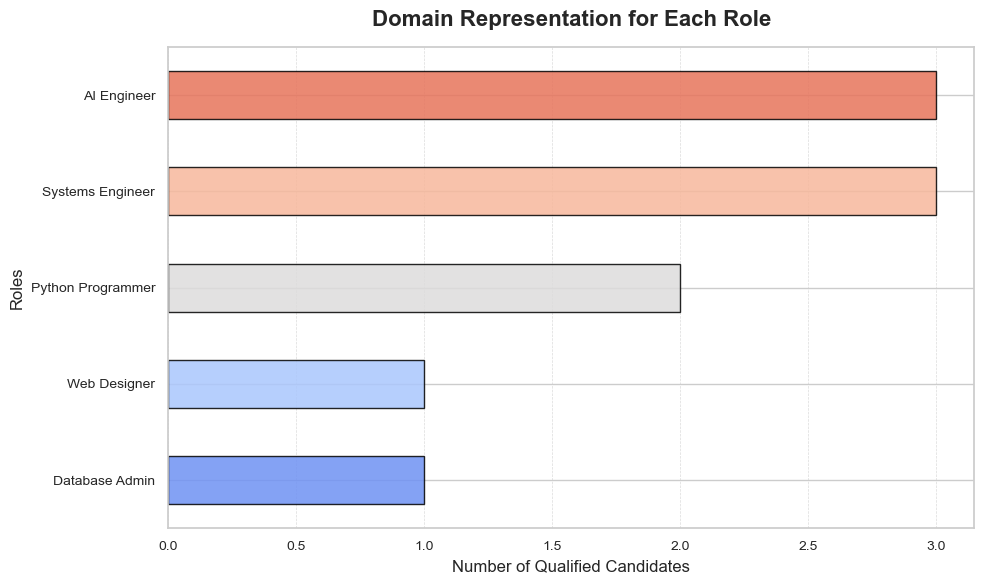

In [34]:
#Data(Candidates and their skills)
candidates = {
    "Jane": ["Database Admin", "Python Programmer"],
    "Jim": ["AI Engineer", "Python Programmer"],
    "Anita": ["Web Designer", "Frontend Developer"],
    "Maria": ["AI Engineer", "Data Scientist"],
    "Juan": ["Systems Engineer", "DevOps Specialist"],
    "Peter": ["AI Engineer", "Backend Developer"],
    "Bruce": ["Systems Engineer", "Network Specialist"],
    "Mary": ["Systems Engineer", "Project Manager"]
}

#To create a binary matrix of skills
roles = ["Database Admin", "Web Designer", "Systems Engineer", "AI Engineer", "Python Programmer"]
skills_matrix = pd.DataFrame([
    {role: int(role in skills) for role in roles} for skills in candidates.values()
], index=candidates.keys())

#To count how many candidates are qualified for each role
role_counts = skills_matrix.sum(axis=0)

#Style and color palette for the chart
sns.set_theme(style="whitegrid")
color_palette = sns.color_palette("coolwarm", len(role_counts))

#Plot the bar chart
plt.figure(figsize=(10, 6))
role_counts.sort_values().plot(
    kind="barh",  #Horizontal bar chart for better readability
    color=color_palette,
    alpha=0.85,
    edgecolor="black",
    linewidth=1
)

#Add titles and labels with consistent styling
plt.title("Domain Representation for Each Role", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Number of Qualified Candidates", fontsize=12)
plt.ylabel("Roles", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Gridlines for clarity
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.7)

#Tighten the layout and show the chart
plt.tight_layout()
plt.show()

### Role Distribution and Requirements
Stacked Bar Chart: To show the required roles (Python Programmers, AI Engineers, Web Designer, Database Admin, Systems Engineer) versus the employees' skills distribution. This gives stakeholders a clear understanding of how individual abilities align with job roles.

In [10]:
import matplotlib.pyplot as plt

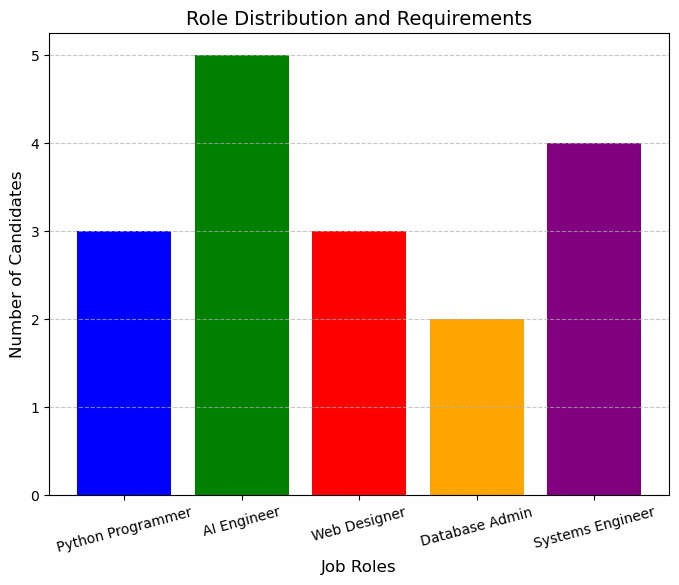

In [23]:
#Data: Roles and their counts
roles = ['Python Programmer', 'AI Engineer', 'Web Designer', 'Database Admin', 'Systems Engineer']
counts = [3, 5, 3, 2, 4]  # Example data for candidates qualified for each role

#Plot
plt.figure(figsize=(8, 6))
plt.bar(roles, counts, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Role Distribution and Requirements', fontsize=14)
plt.xlabel('Job Roles', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Role Allocation Summary (Proportions per Solution)
Pie Chart: Break down the roles fulfilled by individuals in each solution. For example, in Solution 1, who fulfills the AI Engineer, Systems Engineer, etc.

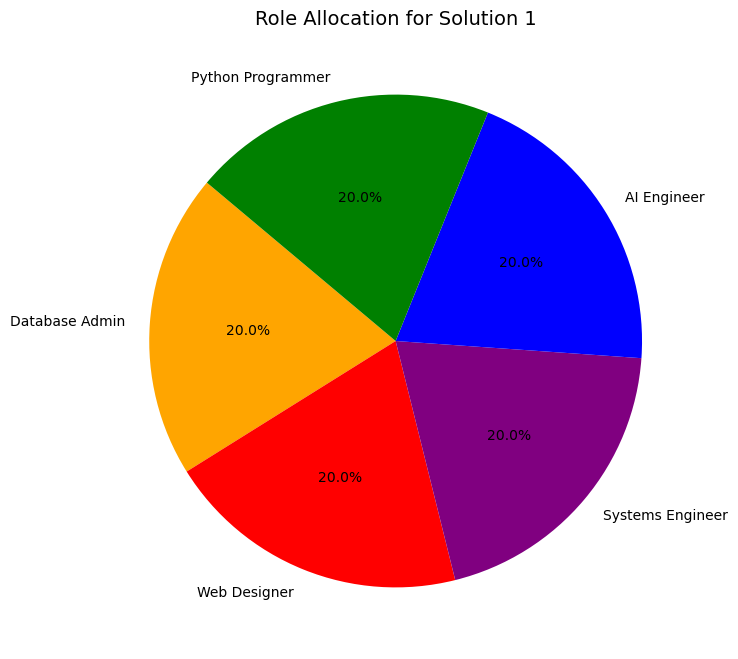

In [32]:
#Data for a single solution
roles = ['Database Admin', 'Web Designer', 'Systems Engineer', 'AI Engineer', 'Python Programmer']
counts = [1, 1, 1, 1, 1]  #Example allocation for Solution 1

#Plot
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=roles, autopct='%1.1f%%', startangle=140, colors=['orange', 'red', 'purple', 'blue', 'green'])
plt.title('Role Allocation for Solution 1', fontsize=14)
plt.show()
